# Практика, осень 2022

### Обработка пропущенных значений

<font size=5>1) Введение</font>

Проблема пропущенных значений существует с самых ранних попыток использовать данные в качестве источника знаний, поскольку она неотъемлемо связана с процессом получения, записи и подготовки самих данных. Ясно, что «лучшее, что можно сделать с пропущенными значениями, — это не иметь их», но в современном мире, учитывая постоянно растущий объем доступных данных — и спрос на них — в статистическом обосновании, это почти никогда не происходит. Основные ссылки на отсутствующие значения включают Schafer (1997), Little and Rubin (1987, 2002), van Buuren (2018)[ https://stefvanbuuren.name/fimd/ ], Carpenter and Kenward (2013) и (Gelman and Hill, 2007) [гл. 25].

Отсутствующие значения возникают по многим причинам: машины выходят из строя, люди забывают или не хотят отвечать на некоторые вопросы анкеты, поврежденные растения и т. д. Они создают проблемы, поскольку большинство статистических методов невозможно применить к неполному набору данных. В этой главе мы рассмотрим различные типы недостающих данных и статистические методы, позволяющие их включить.

<font size=5>1.1) Определение </font>

<font size=4>1.1.1) MCAR, MAR, MNAR </font>

Важно проанализировать как закономерность, так и механизм пропущенных значений. Действительно, методы и свойства методов для работы с пропущенными значениями зависят от обоих. Например, интуитивно мы можем сказать, что если у нас отсутствуют данные почти по всем наблюдениям одной переменной, мы скорее удалим переменную, а не все наблюдения, в которых отсутствуют данные.

Существует несколько типов отсутствующих данных, и объяснение причин, по которым часть данных отсутствует, имеет решающее значение для выполнения выводов или любого статистического анализа. Типология отсутствующих данных вызвала много споров, но мы можем сначала поговорить о наиболее известных механизмах, а именно о MCAR, MAR и MNAR, исторически введенных Рубином в 1976 году.

Работа с пропущенными данными сводится к тому, что мы считаем наблюдаемые данные $X_{OBS}$ только подмонжеством полных данных модели $X=(X_{OBS},X_{MIS})$, которые не полностью наблюдаемы (т.е. $X_{MIS}$ - пропущенные данные). Допустим, $X = (X_1,...,X_p)$; пропущенные значения $X_{MIS}$ характеризуются множеством индексов $I_{MIS} \subset \{1,...,p\}$, так что $X_{MIS}=$ \{$X_i;i \in I_{MIS}$\}. Определим индикатор отсутствия $M \in \{0,1\}^n$ такой, что $M_i=1$ если $i \in I_{MIS}$ и $M_i=0$ иначе; $M$ определяет отсутствие. Оба $X$ и $M$ моделируются как случайные переменные с вероятностными распределениями $P_X$ и $P_M$ соответственно. Считаем, что распределение $M$ задается параметром $\phi$, - например вероятностью $p$ распределения Бернулли.

Разные типы пропущенных данных приводят к разным отношениям зависимости между $X_{OBS},$ $X_{MIS}$ и $M.$

Пропуски называются **полностью случайными (MCAR)**, если вероятность пропуска не зависит от переменных в наборе данных: вероятность пропуска не зависит от $(X_{OBS},X_{MIS}).$ То есть, 

$$P_M(M|X_{OBS},X_{MIS},\phi)=P_M(M), \forall \phi$$

Пропуски называются **случайными (MAR)**, если вероятность пропуска зависит только от наблюдаемых данных $X_{OBS}.$ То есть, 

$$P_M(M|X_{OBS},X_{MIS},\phi)=P_M(M|X_{OBS},\phi), \forall \phi,X_{MIS}$$

Пропуски называются **неслучайными(MNAR)** во всех остальных случаях.

<font size=4>1.1.2) Игнорируемые пропущенные значения</font>

Многие статистические методы основаны на оценке параметра путем максимизации правдоподобия данных. Предположим, что $X$ имеет плотность, параметризованную некоторым параметром $\theta$, который мы хотим оценить - если $X$ является гауссовым, например, мы просто имеем $\theta = ( \mu, \Sigma )$. Предположим, что $М$ также имеет плотность, параметризованную другим параметром $\phi$ - например, вероятность $P$ распределения Бернулли. В некоторых случаях оценивая $\theta$ из неполных данных можно сделать простым способом, игнорируя или «пропуская» механизм отсутствующих данных, как подробно описано ниже.

Мы обозначаем через $f(Х, М;\theta ,\phi )$ совместную плотность наблюдаемых и отсутствующих данных и показателя отсутствия, обусловленного параметрами $\theta$ и $\phi$. В контексте оценки максимального правдоподобия мы максимизируем относительно $\theta$ предельную плотность наблюдаемых данных $X_{OBS}$

$$f(X_{OBS},M;\theta,\phi)=\int f(X_{OBS},X_{MIS},M;\theta,\phi) dX_{MIS}.$$

Если данные - **MAR** (или **MCAR**), происходит следующая факторизация

$$f(X_{OBS},X_{MIS},M;\theta,\phi)=f(X_{OBS},X_{MIS};\theta)f(M|X_{OBS};\phi). $$

Подставляя это в выражение предельной плотности, получаем

$$f(X_{OBS},M;\theta,\phi)=\int f(X_{OBS},X_{MIS};\theta)f(M|X_{OBS};\phi)dX_{MIS}, $$

$$f(X_{OBS},M;\theta,\phi)=f(M|X_{OBS};\phi) \int f(X_{OBS},X_{MIS};\theta)dX_{MIS}, $$

$$f(X_{OBS},M;\theta,\phi)=f(M|X_{OBS};\phi)f(X_{OBS};\theta). $$

Если $\phi$ и $\theta$ различны (совместное пространство параметров ($\phi,$ $\theta$) - произведение пространств $\phi,$ $\theta$), и $f(M|X_{OBS};\phi)$ не зависит от $\theta$, подсчет максимального правдоподобия $\theta$ эквивалентен максимизации правдоподобия $f(X_{OBS};\theta)$, т.е игнорируются пропущенные данные. На самом деле это означает, что при выполнении логического вывода, т. е. для получения оценок МО для параметров из неполного набора, можно «просто» максимизировать наблюдаемую вероятность, игнорируя процесс, создавший пропущенные значения. Следовательно, большинство методов, используемых на практике, основаны на предположении, что данные представляют собой MAR. Если это предположение не выполняется, необходимо указать модель для отсутствующих значений  (т.е для $f(M|X;\phi)$), чтобы сделать вывод для $\theta$.

<font size=5>1.2) Два рекомендуемых метода: EM/Множественное вменение</font>

Таким образом, в соответствии с классическим предположением о случайных пропусках (MAR) параметры могут быть оценены путем максимизации наблюдаемой вероятности. Для этого можно использовать алгоритм максимизации ожидания (EM) (Dempster, Laird, and Rubin, 1977), как подробно описано в следующем абзаце. Стандартная ошибка параметров может быть оценена с использованием дополненного алгоритма максимизации ожидания (Meng and Rubin, 1991), формулы Луи или метода начальной загрузки. Это первая основная стратегия для вывода с пропущенными значениями. Фактически она заключается в адаптации статистического анализа (процесса оценки) таким образом, чтобы его можно было применять к неполному набору данных. Он адаптирован к конкретному статистическому методу, но у него есть два недостатка: 1) его может быть трудно реализовать (алгоритм EM может включать интеграл, который нелегко вычислить); 2) для каждого статистического метода, который мы хотели бы применить, должен быть разработан конкретный алгоритм.

Вот почему вторая стратегия, а именно множественное вменение (Rubin, 1987; Little and Rubin, 1987, 2002), кажется, стала ведущей. Вменение означает замену отсутствующих значений правдоподобными значениями для получения полных данных. Принцип множественного вменения заключается в прогнозировании разных значений $M$ для каждого отсутствующего значения, что приводит к $M$ вмененным наборам данных. Изменчивость вменения отражает дисперсию прогноза каждой отсутствующей записи. Затем множественное вменение состоит в выполнении статистического анализа каждого набора вмененных данных для оценки параметра $\theta$, а затем объединяются результаты $(\theta_m)_{1 \leq m \leq M}$, чтобы предоставить уникальную оценку для $\theta$ и для связанной с ним изменчивости с использованием правил Рубина (Rubin, 1987). Это гарантирует, что оценка дисперсии не будет недооценена и, следовательно, имеются хорошие покрывающие свойства.

Важно то, что цель обоих подходов (EM и множественное вменение) состоит в том, чтобы как можно лучше оценить параметры и их дисперсию, несмотря на пропущенные значения, т.е. с учетом дополнительной изменчивости из-за пропущенных значений. Цель состоит не в том, чтобы как можно точнее добавить записи. В этом случае мы будем говорить об однократном вменении, когда можно получить один вмененный набор данных.

<font size=5> 2) Вывод максимального правдоподобия с пропусками </font>

<font size=4> 2.1) EM-алгоритм </font>

В случае, когда нас интересует оценка неизвестных параметров $\theta \in R^d$, характеризующих модель (таких как $\mu$ и $\Sigma$ в случае с Гауссовским распределением), EM-алгоритм может быть использован, когда совместное распределение пропусков $X_{MIS}$ и наблюдаемых данных $X_{OBS}$ явно. Для всех $\theta \in R^d$, пусть $f(X;\theta)$ - функция протности вероятности для $X=(X_{OBS},X_{MIS})$.
EM-алгоритм помогает найти оценку $\theta$, которая максимизирует правдоподобие наблюдаемых данных, т.е. функцию плотности вероятности наблюдений:
    
$$l(\theta;X_{OBS})=\log f(X_{OBS};\theta)=\log \int f(X_{OBS},X_{MIS};\theta)dX_{MIS}.$$

Поскольку это количество не может быть вычислено явно в общих случаях, алгоритм EM находит MLE путем итеративной максимизации ожидаемого логарифмического правдоподобия полных данных. Мы обозначаем логарифмическую вероятность полных данных как

$$l(X;\theta)=\log f(X_{OBS},X_{MIS};\theta).$$

Начинаем с начальным значением $\theta^{(0)}$ и пусть $\theta^{(t)}$ будет оценкой $\theta$ на итерации $t$, тогда следующая итерация EM состоит из двух шагов:

1) E-шаг. Вычислить ожидание заполненных логарифмическим правдоподобием данных, относительно условного распределения отсутствующей ковариаты, параметризуемой с помощью $\theta^{(t)}$.

$$Q(\theta,\theta^{(t)})=E[l(X;\theta)|X_{OBS};\theta^{(t)}]=\int l(X;\theta) f(X_{MIS}|X_{OBS};\theta^{(t)}) dX_{MIS}, $$

2) M-шаг. Определить $\theta^{(t+1)}$ путем максимизации функции Q:
    
$$ \theta^{(t+1)} \in \arg \max_{\theta}Q(\theta,\theta^{(t)}) $$

Следующее критическое свойство мотивирует ЕМ-алгоритм.

Свойство: Для всех $\theta, \theta^{(t)}$,
$$l(X_{OBS};\theta)-l(X_{OBS};\theta^{(t)}) \geq Q(\theta, \theta^{(t)})-Q(\theta^{(t)}, \theta^{(t)})$$.

Следовательно, любое значение $\theta$, что улучшает $Q(\theta, \theta^{(t)})$ сверх эталонного значения $Q(\theta^{(t)}, \theta^{(t)})$, не уменьшит правдоподобие наблюдаемых данных. Базируясь на этом неравенстве, ЕМ-алгоритм продуцирует итеративно последовательность параметрических оценок $(\theta^{(t)})_{t \geq 0}$.

Практический интерес этого алгоритма можно оценить только в тех случаях, когда $Q(\theta^{(t)}, \theta^{(t)})$ может быть вычислено или оценено с разумными вычислительными затратами (например частный случай, когда $f_{\theta}$ принадлежит к экспоненциальному семейству) и когда $\theta \mapsto Q(\theta, \theta^{(t)})$ может быть максимизирована (по крайней мере, численно).

Предположим сначала, что полные данные $(Х)$ имеет многомерное нормальное распределение $N(\mu,\Sigma)$. Параметры $\mu$ и $\Sigma$ можно оценить с помощью процедур, основанных на максимальном правдоподобии, для неполных моделей данных, таких как описанный выше алгоритм максимизации ожидания.

In [1]:
#Импортируем необходимые библиотеки
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy.stats import t
import warnings
#Новая библиотека с выделенными функциями
import grandtools as gt
warnings.filterwarnings('ignore')

<font size=4>Упражнение: EM для данных из двумерного Гауссовского распределения</font>
    
Цель этой задачи состоит в том, чтобы использовать алгоритм EM для оценки среднего двумерного нормального набора данных с отсутствующими элементами в одной из двух переменных. Сначала мы генерируем синтетические данные, а затем реализуем алгоритм EM для вычисления оценки среднего значения.

Рассмотрим двумерную нормальную случайную величину $y =  \begin{pmatrix} y_1\\ y_2 \end{pmatrix}$, и обозначим вектор средних и ковариационную матрицу так: $\mu =  \begin{pmatrix} \mu_1\\ \mu_2 \end{pmatrix} $, $\sigma =  \begin{pmatrix} \sigma_{11}&\sigma_{12}\\ \sigma_{21}&\sigma_{22} \end{pmatrix} $, т.е. $ y ~ N(\mu,\Sigma)$. Датасет имеет $n$ объектов, часть из которых имеют пропуски в $y_2$.
Цель: рассчитать среднее $\mu$. Сравним две стратегии:
        
1) Прямое вычисление оценки максимального правдоподобия
2) Оценка с помощью EM-алгоритма

<font size=3> Генерация данных </font>

**(R1)** Сгенерировать двумерное множество с нормальным распределением размера $n=100$, со средним и ковариационной матрицей, соответственно:
$$ \begin{pmatrix} \mu_1\\ \mu_2 \end{pmatrix}  =  \begin{pmatrix} 5\\ -1\end{pmatrix}  и  \begin{pmatrix} \sigma_{11}&\sigma_{12}\\ \sigma_{21}&\sigma_{22} \end{pmatrix}  =  \begin{pmatrix} 1.3&0.4\\ 0.4&0.9\end{pmatrix} , $$

имеющее 30% пропусков только во переменной $y_2$.


In [2]:
#R1
n=100
r=math.floor(n*0.3)
mu=[5, -1]
Sigma=[[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.seed(50)
random.shuffle(h)
for i in range(len(h)):
    if h[i]==0:
        Y[i,1]=None

<font size=3> Оценка максимального правдоподобия </font>

Пусть индексы 1,...,r соответствуют данным, для которых нет пропуска в $y_2$.
Обозначим как $f_{1,2}(y_1,y_2;\mu,\Sigma),f_1(y_1;\mu,\sigma_{11})$ и $f_{2|1}(y_2|y_1;\mu,\Sigma)$, соответственно, вероятность совместного распределения $(y_1,y_2)$, 
частного распределения $y_1$ и условного распределения $y_2|y_1$. Совместное распределение наблюдаемых данных может бы представлено как:
    
$$f_{1,2}(y_1,y_2;\mu,\Sigma)=\prod\limits_{i=1}^n f_1 (y_{i1};\mu_1,\sigma_{11}) \prod\limits_{j=1}^r f_{2|1} (y_{j2}|y_{j1};\mu,\Sigma)$$,

и наблюдаемое логарифмическое правдоподобие записывается (с точностью до дополнительной константы, которая не появляется при максимизации и которую мы поэтому опускаем):

$$l(\mu,\Sigma;y_1,y_2)=-\frac{n}{2}\log(\sigma_{11}^2)-\frac{1}{2}\sum\limits_{i=1}^n \frac{{y_{i1}-\mu_1}^2}{\sigma_{11}^2}-\frac{r}{2} \log((\sigma_{22}-\frac{\sigma_{12}^2}{\sigma_{11}})^2)-\frac{1}{2}\sum\limits_{i=1}^r \frac{(y_{i2}-\mu_2-\frac{\sigma_{12}}{\sigma_{11}}(y_{i1}-\mu_1))^2}{(\sigma_{22}-\frac{\sigma_{12}^2}{\sigma_{11}})^2} $$

Пропускаем вычисления и напрямую даем выражение закрытой формы оценки максимального правдоподобия среднего:
    
$$\hat{\mu}_1=n^{-1} \sum\limits_{i=1}^n {y_{i1}} $$

$$\hat{\mu}_2=\hat{\beta}_{20.1}+\hat{\beta}_{21.1}\hat{\mu}_1,$$

где

$$\hat{\beta}_{21.1}=s_{12}/s_{11},   \hat{\beta}_{20.1}=\bar{y}_2-\hat{\beta}_{21.1}\bar{y}_1,$$

$$\bar{y}_j=r^{-1} \sum\limits_{i=1}^r {y_{ij}}   \;  и   \;    s_{jk}=r^{-1} \sum\limits_{i=1}^r (y_{ij}-\bar{y}_j)(y_{ik}-\bar{y}_k),  \; j,k=1,2 $$

**(R2)** Вычислить оценку максимального правдоподобия для $\mu_1$ и $\mu_2$ 


In [3]:
#R2
hat_mu1=(1/n)*sum(Y[:,0])
def estimators(a):
    y1_bar=np.mean(a[:,0])
    y2_bar=np.mean(a[:,1])
    s11=np.mean((a[:,0]-y1_bar)**2)
    s22=np.mean((a[:,1]-y2_bar)**2)
    s12=np.mean((a[:,0]-y1_bar)*(a[:,1]-y2_bar))
    return y1_bar, y2_bar, s11, s22, s12
y1_bar, y2_bar, s11, s22, s12 = estimators(gt.cleared_arr(Y))
hat_beta_21_1=s12/s11
hat_beta_20_1 = y2_bar-hat_beta_21_1*y1_bar
hat_mu2=hat_beta_21_1*hat_mu1+hat_beta_20_1
res_ml=(hat_mu1,hat_mu2)

<font size=3>EM алгоритм</font>

В этой простой настройке у нас есть явное выражение оценки максимального правдоподобия, несмотря на пропущенные значения. Однако это не всегда так, но можно использовать EM-алгоритм, который позволяет получить оценки максимального правдоподобия в случаях отсутствия данных.

EM-алгоритм состоит в максимизации "наблюдаемого правдоподобия"

$$l(\mu,\Sigma;y_1,y_2)=-\frac{n}{2}\log(\sigma_{11}^2)-\frac{1}{2}\sum\limits_{i=1}^n \frac{{y_{i1}-\mu_1}^2}{\sigma_{11}^2}-\frac{r}{2} \log((\sigma_{22}-\frac{\sigma_{12}^2}{\sigma_{11}})^2)-\frac{1}{2}\sum\limits_{i=1}^r \frac{(y_{i2}-\mu_2-\frac{\sigma_{12}}{\sigma_{11}}(y_{i1}-\mu_1))^2}{(\sigma_{22}-\frac{\sigma_{12}^2}{\sigma_{11}})^2}, $$

путем последовательной максимизации «полной вероятности» (если бы мы наблюдали все $n$ реализации $у_1$ и $у_2$). Максимизация полной вероятности

$$l_c(\mu,\Sigma;y_1,y_2)=-\frac{n}{2} \log (det(\Sigma))-\frac{1}{2} \sum\limits_{i=1}^n {(y_{i1}-\mu_1)}^T \Sigma^{-1}(y_{i1}-\mu_1)$$

было бы просто, если бы у нас были все наблюдения. Однако элементы этой вероятности отсутствуют. Следовательно, мы заменяем их условным математическим ожиданием с учетом наблюдаемых данных и параметров текущей итерации. Эти два шага вычисления условного ожидания (E-шаг) и максимизации завершенного правдоподобия (M-шаг) повторяются до сходимости.

Формулы обновления для шагов E и M следующие:

**E шаг:**
    
Достаточные статистики правдоподобия:
    
$$s_1=\sum_{i=1}^n y_{i1}, \: s_2=\sum_{i=1}^n y_{i2}, \: s_{11}=\sum_{i=1}^n  y_{i1}^2, \: s_{22}=\sum_{i=1}^n y_{i2}^2, \:s_{12}=\sum_{i=1}^n y_{i1}y_{i2}$$
                
Поскольку некоторые значения$у_2$ недоступны, мы заполняем достаточные статистики:
    
$$ E[y_{i2}|y_{i1};\mu,\Sigma] = \beta_{20.1}+\beta_{21.1}y_{i1} $$

$$E[y_{i2}^2|y_{i1};\mu,\Sigma] = {\beta_{20.1}+\beta_{21.1}y_{i1}}^2+\sigma_{22.1} $$

$$ \sigma_{22.1}=\sigma_{22}-\frac{\sigma_{12}^2}{\sigma_{11}} $$
$$E[y_{i2}|y_{i1};\mu,\Sigma] = {\beta_{20.1}+\beta_{21.1}y_{i1}}y_{i1}. $$


**М-шаг:**
    М-шаг состоит в вычислении оценки максимального правдоподобия, как обычно. Даны $s_1,s_2,s_{11},s_{22},s_{12},$ обновим $\hat{\mu}$ и $\hat{\sigma}$ 
    $$ \hat{\mu}_1=s_1/n,  \hat{\mu}_2=s_2/n,$$

$$ \hat{\sigma}_1=s_{11}/n-\hat{\mu}_1^2,\hat{\sigma}_2=s_{22}/n-\hat{\mu}_2^2,\hat{\sigma}_{12}=s_{12}/n-\hat{\mu}_1 \hat{\mu}_2 $$

**(R3)** Напишите функции для реализации E-шага и M-шага.

In [4]:
#R3
def Estep(Y,mu,Sigma):
    n=len(Y)
    sigma_22_1=Sigma[1,1]-(Sigma[0,1]**2)/Sigma[0,0]
    beta_21_1=Sigma[0,1]/Sigma[0,0]
    beta_20_1=mu[1]-beta_21_1*mu[0]
    E_y2=np.zeros(n)
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            E_y2[i]=beta_20_1+beta_21_1*Y[i,0]
        else:
            E_y2[i]=Y[i,1]
    E_y1=Y[:,0].copy()
    E_y2_y2=np.zeros(n)
    for i in range(len(E_y2)):
        if np.isnan(Y[i,1])==True:
            E_y2_y2[i]=E_y2[i]**2+sigma_22_1
        else: 
            E_y2_y2[i]=E_y2[i]**2
    E_y1_y1=Y[:,0]**2
    E_y1_y2=np.zeros(n)
    E_y1_y2=E_y2*E_y1
    return sum(E_y1), sum(E_y2), sum(E_y1_y1), sum(E_y1_y2), sum(E_y2_y2)
# s1, s2, s11, s12, s22
def Mstep(Y, s1, s2, s11, s12, s22):
    n=len(Y)
    mu1=s1/n
    mu2=s2/n
    sigma1=s11/n-mu1**2
    sigma2=s22/n-mu2**2
    sigma12=s12/n-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[sigma1,sigma12],[sigma12,sigma2]],dtype=np.float64)
    return mu,Sigma

**(Q1)** Как мы могли бы инициализировать алгоритм?

**(R4)** Реализовать функцию, называемую initEM, которая возвращает начальные значения $\hat{\mu}$ и $\hat{\Sigma}$ .

In [5]:
#R4
def initEM(Y):
    n=len(Y)
    mv=0
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            mv+=1
    r=n-mv
    mu1=np.mean(Y[:,0])
    Z=Y[:,1]
    Z0=list()
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==False:
            Z0.append(Y[i,0])
    Z = Z[~np.isnan(Z)]
    mu2=np.mean(Z)
    s1=np.mean(Y[:,0]**2)-mu1**2
    s2=np.mean(Z)-mu2**2
    s12=np.mean(Z0*Z)-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[s1,s12],[s12,s2]],dtype=np.float64)
    return mu,Sigma
    


**(R5)** Реализуйте 50 итераций EM-алгоритма и постройте график значения $\|\mu-\hat{\mu}\|^2$ на протяжении итераций. Кратко прокомментируйте результаты.

mu: [ 5.04769505 -0.95041503] 
 Sigma: [[ 1.18667258  0.13094512]
 [ 0.13094512 -1.85370375]]


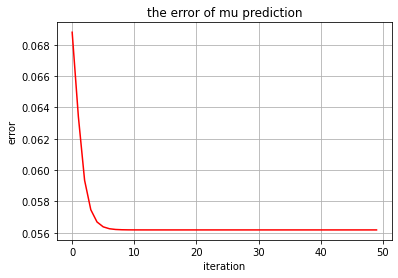

In [6]:
#R5
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
hat_Sigma=i_Sigma.copy()
print('mu:',i_mu,'\n','Sigma:',i_Sigma)
error_mu=np.zeros(50)

for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu-mu)**2))
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
plt.plot(list(error_mu),color='red')
plt.title('the error of mu prediction')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid()
plt.show()
    


**(R6)** Проверим, что EM-оценка $\mu$ равна оценке максимального правдоподобия.

In [7]:
#R6
resEM=hat_mu
print('res_ml',res_ml)
print('resEM',resEM)

res_ml (5.047695051882563, -0.9703104372887916)
resEM [ 5.04769505 -0.97031044]


**(Q7)** Одно замечание состоит в том, что доля отсутствующей информации - не то же самое, что процент отсутствующих данных. Пожалуйста, посчитайте эти два термина.\
Подсказка: доля отсутствующей информации может быть посчитана по скорости сходимости: $\lambda^{(t)}=\frac{\mu_2^{(t+1)}-\mu_2^{(t)}}{\mu_2^{(t)}-\mu_2^{(t-1)}}$ на t-й итерации.\
(Смотрите часть 2.2 для дальнейшего объяснения отсутствующей информации)

In [8]:
#Q7
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
old_hat_mu=old_old_hat_mu=0
hat_Sigma=i_Sigma.copy()
error_mu=np.zeros(20)
for i in range(20):
    old_old_hat_mu=old_hat_mu
    old_hat_mu=hat_mu
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
    if (i>=3):
        print('Iteration=',i,", Convergence rate of mu2 =",(hat_mu-old_hat_mu)[1]/(old_hat_mu-old_old_hat_mu)[1],'\n')
num_miss=0
num=len(Y[:,1])
for i in range(len(Y)):
    if np.isnan(Y[i,1]):
        num_miss+=1
print("Percentage of missingness is:", num_miss/num)

Iteration= 3 , Convergence rate of mu2 = 0.4358696876454373 

Iteration= 4 , Convergence rate of mu2 = 0.4075393268837623 

Iteration= 5 , Convergence rate of mu2 = 0.3931901365934239 

Iteration= 6 , Convergence rate of mu2 = 0.3851334450313549 

Iteration= 7 , Convergence rate of mu2 = 0.3803466550906084 

Iteration= 8 , Convergence rate of mu2 = 0.3774066030610461 

Iteration= 9 , Convergence rate of mu2 = 0.37556384891189365 

Iteration= 10 , Convergence rate of mu2 = 0.37439414594951853 

Iteration= 11 , Convergence rate of mu2 = 0.37364569363652017 

Iteration= 12 , Convergence rate of mu2 = 0.37316432508210157 

Iteration= 13 , Convergence rate of mu2 = 0.372853713865942 

Iteration= 14 , Convergence rate of mu2 = 0.37265286078858656 

Iteration= 15 , Convergence rate of mu2 = 0.3725228000415937 

Iteration= 16 , Convergence rate of mu2 = 0.37243853752016215 

Iteration= 17 , Convergence rate of mu2 = 0.3723837408945705 

Iteration= 18 , Convergence rate of mu2 = 0.3723485679195

**(R7)** Мы можем убедиться, что данные не MAR, но MNAR, исходя из того что имеется смещение оценок, и необходимо указывать модель для отсутствующих данных. Данные MNAR генерируются с использованием цензуры.

In [9]:
#R7-1
n = 100
r = math.floor(n*0.3)
mu = [5, -1]
Sigma = [[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.shuffle(h)
Y1=Y.copy()
for i in range(len(h)):
    if h[i]==0:
        Y1[i,1]=None
Y2=Y.copy()
MinValueToDelete=np.flip(np.sort(Y[:,1]))[29]
deletescore=0
for i in range(len(Y2)):
    if deletescore<30 and Y2[i,1]>=MinValueToDelete:
        Y2[i,1]=None


In [10]:
#R7-2
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma

#MAR
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y1, hat_mu_MAR, hat_Sigma_MAR)
    hat_mu_MAR, hat_Sigma_MAR=Mstep(Y1, s1, s2, s11, s22, s12)


#MNAR
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MNAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y2, hat_mu_MNAR, hat_Sigma_MNAR)
    hat_mu_MNAR, hat_Sigma_MNAR=Mstep(Y2, s1, s2, s11, s22, s12)

print('hat_mu_MAR:',hat_mu_MAR)
print('hat_mu_MNAR:',hat_mu_MNAR)
print('hat_Sigma_MAR:',hat_Sigma_MAR)
print('hat_Sigma_MNAR:',hat_Sigma_MNAR)

hat_mu_MAR: [ 5.01887594 -0.78934252]
hat_mu_MNAR: [ 5.01887594 -0.58419858]
hat_Sigma_MAR: [[ 1.48906787  3.5015529 ]
 [ 3.5015529  -3.45076881]]
hat_Sigma_MNAR: [[ 1.48906787  4.30370254]
 [ 4.30370254 -1.44900498]]


<font size=5>3) Однократное вменение</font>

Практика однократного вменения, заменяющая отсутствующие значения правдоподобными значениями, может быть опасной («Идея вменения одновременно соблазнительна и опасна. Она соблазнительна, потому что может убаюкать пользователя до приятного состояния веры в то, что данные в конце концов полны, и это опасно, потому что оно объединяет ситуации, когда проблема достаточно незначительна, чтобы с ней можно было законно справиться таким образом, и ситуации, когда стандартные оценки, примененные к реальным и вмененным данным, имеют существенные смещения» (Dempster and Rubin, 1983)). Действительно, если статистический анализ выполняется на вмененном наборе данных, дисперсия оценок будет слишком короткой, поскольку изменчивость прогноза пропущенных значений не принимается во внимание. Поэтому рекомендуется множественное вменение. Тем не менее, однократному вменению до сих пор уделяется внимание в статистической литературе. Это может быть уместно, когда нужно просто заполнить один набор данных или когда не требуется никаких выводов. Кроме того, однократное вменение является первым шагом к множественному вменению.

Существует огромное количество литературы по методам вменения непрерывных данных или категориальных данных (Little and Rubin, 2002).

<font size=4>3.1) Однократное вменение со средними значениями или с регрессией - двумерный случай</font>

Методы однократного вменения заполняют пропущенные значения правдоподобными значениями, что приводит к завершенному набору данных, который можно анализировать любым статистическим методом. Однако самые классические методы вменения имеют недостатки, которые хорошо описаны в литературе. Знаменитое вменение среднего значения сохраняет среднее значение вмененной переменной, но уменьшает его дисперсию и искажает корреляцию с другими переменными.

Заполнение средним значением на самом деле является методом, который не следует рекомендовать. Его последствия катастрофичны (см. пример экологических данных). В случае значений MCAR действительно предпочтительнее исключить наблюдения, в которых отсутствуют данные (действительно, мы получаем только небольшой размер выборки, но оценки, рассчитанные для этой выборки, будут несмещенными, но обязательно более изменчивыми), а не заполнять средним значением, которое может привести к смещенным оценкам.

Заполнение по регрессии, например, улучшает вменение с учетом взаимосвязи между переменными. Однако частное и совместное распределение переменных по-прежнему искажено. Эти распределения можно сохранить, используя более сложные методы вменения, такие как стохастическое заполнение по регрессии. Последнее состоит в заполнении предсказанных значений из регрессионной модели плюс случайный шум, взятый из нормального распределения с дисперсией, равной остаточной дисперсии.

<font size=4> 3.1.1) Дополнительно: Иллюстрация методов однократного вменения </font>
    
Цель состоит в том, чтобы оценить различные стратегии обработки пропущенных значений: удаление, заполнение средним, заполнение по регрессии, стохастическое заполнение по регрессии. Затем, чтобы решить проблемы однократного вменения, будет использоваться множественное вменение.
    
1. Сгенерируйте двумерные данные с $n=100,$ взятые из Гауссовского распределения с $\mu_y=\mu_x=125,$ стандартным отклонением $\sigma_y=\sigma_x=25$ и корреляцией $\rho=0.6.$ Заметим, что $\theta=\mu_y$

In [11]:
n=100

In [12]:
don, donmiss = gt.data_maker()

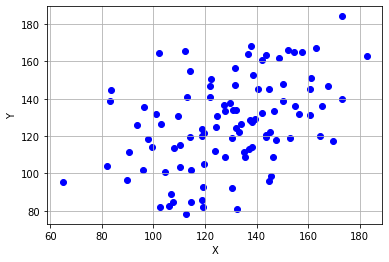

In [13]:
#Визуализация полных данных
plt.scatter(don[:,0],don[:,1],color='blue')
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
d_miss=np.zeros((73,2))
d_obs=np.zeros((27,2))
k1=0
k2=0
for i in range(len(donmiss)):
    if np.isnan(donmiss[i,1]):
        d_miss[k1]=[donmiss[i,0],d1]
        k1+=1
    else:
        d_obs[k2]=donmiss[i]
        k2+=1

Очень популярный подход к обработке отсутствующих значений состоит в замене отсутствующих записей правдоподобными значениями для получения полного набора данных, который можно проанализировать любым статистическим методом. Наиболее популярная стратегия состоит в подстановке среднего значения наблюдаемых значений. Но вы можете принять во внимание взаимосвязь между переменными и, например, применить регрессию. Однако, чтобы как можно лучше сохранить совместное и частное распределения, вы можете предпочесть вменение с помощью стохастической регрессии, что означает добавление к вменению с помощью регрессии случайного извлечения из распределения Гаусса со средним значением, равным нулю, и дисперсией, равной дисперсии остатков. Оценим эти подходы.

<font size=3>Заполнение средним</font>

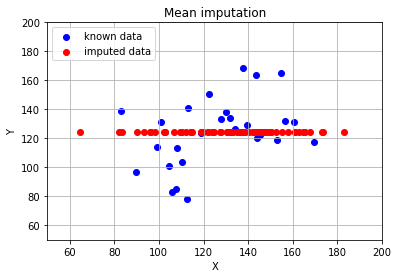

In [15]:
# Визуализация заполнения средними (Mean imputation)
gt.plot_maker(d_obs[:,0],d_obs[:,1],d_miss[:,0],d_miss[:,1],"Mean imputation")

<font size=3> Регрессия </font>

In [16]:
reg = linear_model.LinearRegression()
reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
e_miss=np.zeros((73,2))
k3=0
for i in range(len(donmiss)):
    if np.isnan(donmiss[i,1]):
        e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
        k3+=1

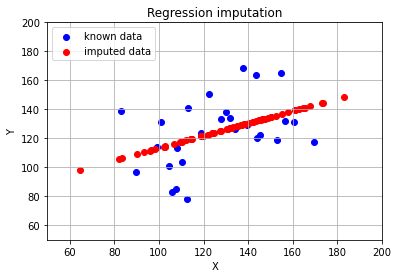

In [17]:
# Визуализация заполнения по регрессии (Regression imputation)
gt.plot_maker(d_obs[:,0],d_obs[:,1],e_miss[:,0],e_miss[:,1],"Regression imputation")

<font size=3> Стохастическое заполнение по регрессии </font>

In [18]:
m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
sigma=np.sqrt(np.var(d_obs[:,1]-m_obs))
stch_impute=gt.gaussian_noise(m_miss,mu=0,std=sigma)

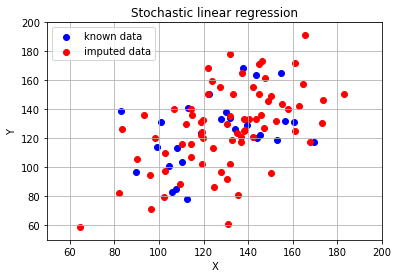

In [19]:
# Визуализация стохастического заполнения по регрессии (Stochastic regression imputation)
gt.plot_maker(d_obs[:,0],d_obs[:,1],e_miss[:,0],stch_impute,"Stochastic linear regression")

Кажется, что мы решили проблему с пропущенными значениями с помощью этого стохастического заполнения по регрессии. Вмененные данные выглядят как исходные данные.

4. Для каждой стратегии (заполнение средними, заполнение по регрессии, стохастическое заполнение по регрессии) посчитайте эмпирическое среднее для $y$ ($\hat{\theta}=\bar y$), его стандартное отклонение ($\hat{\sigma}_y$), корреляцию между $x$ и $y$ $(r(X,Y))$, доверительный интервал для $\mu_y$ и ширину доверительного интервала.

In [20]:
def results_maker(X):
    d=np.zeros((7,3))
    for i in range(3):
        d[0,i]=np.mean(X[i])
        d[1,i]=np.sqrt(np.var(X[i]))
        d[2,i]=np.corrcoef(X[i],don[:,0])[0,1]
        d[3,i]=d[0,i]-d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[4,i]=d[0,i]+d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[5,i]=d[4,i]-d[3,i]
        d[6,i]=int(d[4,i]>125 and 125>d[3,i])
    return d
imputed_data=np.array([list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
results=pd.DataFrame(results_maker(imputed_data),index=["muhat_y", "sigmahat_y", "cor", "inf", "sup", "width", "coverage"],columns=["MEAN","REG", "STOCH"])
print(results)

                  MEAN         REG       STOCH
muhat_y     124.435180  125.769967  126.433229
sigmahat_y   11.941122   14.707450   26.484905
cor           0.099728    0.057567    0.092950
inf         122.065803  122.851690  121.178049
sup         126.804558  128.688244  131.688409
width         4.738755    5.836554   10.510359
coverage      1.000000    1.000000    1.000000


Дисперсия $y$ недооценена при заполнении средним или по регрессии. Поэтому, доверительный интервал для среднего $y$, $\mu_y$, может быть неточным. Корреляция между x и y также практически уничтожается этими методами вменения. Результаты, полученные стохастическим заполнением/вменением по регрессии (среднее $y$, дисперсия $y$, и корреляция между $x$ и $y$) хорошо оценены.

6. Повторите шаги 1, 3, 4, и 1000 раз (генерируйте данные, генерируйте пропуски, вменяйте данные, посчитайте некоторые статистики) и посчитайте смещение величины $\hat{\theta}$, покрытие доверительного интервала для $\mu_y$, также как и среднюю ширину доверительных интервалов.

In [21]:
def SimuMiss():
    don, donmiss = gt.data_maker()
    d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
    d_miss=np.zeros((73,2))
    d_obs=np.zeros((27,2))
    k1=0
    k2=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            d_miss[k1]=[donmiss[i,0],d1]
            k1+=1
        else:
            d_obs[k2]=donmiss[i]
            k2+=1
    reg = linear_model.LinearRegression()
    reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
    e_miss=np.zeros((73,2))
    k3=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
            k3+=1
    m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
    m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
    #sigma=np.sqrt(np.var(d_obs[:,1]))
    sigma=np.sqrt(np.var(d_obs[:,1]-m_obs))
    stch_impute=gt.gaussian_noise(m_miss,mu=0,std=sigma)
    imputed_data=np.array([list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
    pre_results=results_maker(imputed_data)
    results=[pre_results[0],pre_results[5],pre_results[6]]
    return results
    
    

In [22]:
thousand_results=np.zeros((1000,3,3),dtype=np.float64)
thr=thousand_results
for i in range(1000):
    thr[i]=SimuMiss()
bias=[np.mean(thr[:,0,0]-125),np.mean(thr[:,0,1]-125),np.mean(thr[:,0,2]-125)]
cov=[np.mean(thr[:,2,0]),np.mean(thr[:,2,1]),np.mean(thr[:,2,2])]
avg_width=[np.average(thr[:,1,0]),np.average(thr[:,1,1]),np.average(thr[:,1,2])]
res=[bias,cov,avg_width]
print(pd.DataFrame(data=res,index=['bias','cov','avg_width'],columns=['MEAN','REG','STOCH']))

               MEAN       REG      STOCH
bias      -0.086558 -0.001395   0.604219
cov        0.409000  0.604000   0.772000
avg_width  5.031688  7.259555  10.420861


7. Каково ваше объяснение относительно предыдущих результатов. Что можно сделать?

Цель состоит в том, чтобы показать, что даже стохастическая регрессия не может обеспечить точное покрытие в рамках MCAR, поскольку это **метод однократного вменения,** и он не отражает изменчивости из-за пропущенных значений. Действительно, при вменении стохастической регрессии оценки среднего значения, дисперсии и коэффициента корреляции являются несмещенными, но дисперсия оценок (дисперсия оценки среднего значения y) слишком мала. Действительно, мы рассматриваем наблюдаемые значения и вмененные значения одинаково, в то время как вмененные значения прогнозируются с помощью модели, поэтому существует неопределенность, связанная с прогнозом, которую необходимо учитывать в последующем анализе. Решением является множественное вменение. Вы должны отметить, что способ работы с пропущенными значениями зависит от вашей конечной цели. Если цель состоит в том, чтобы сделать вывод, оценивая параметры и их дисперсию как можно лучше, то одиночное вменение опасно (одно значение не может отражать дисперсию прогноза).

8. Повторите предыдущий анализ для механизмов MAR и MNAR, где пропуски вставляются в переменную 2, если значения переменной 1 меньше 140, и где пропуски вставляются в переменную 2, когда её значения меньше 140.

In [23]:
#3.2.8
def alt_results(X,na):
    d=np.zeros((6,4))
    for i in range(4):
        d[0,i]=np.mean(X[i])
        d[1,i]=np.sqrt(np.var(X[i]))
        if i==0:
            d[2,0]=d[0,0]-d[0,1]*t.ppf(0.975,100-na-1)/np.sqrt(100-na-1)
            d[3,0]=d[0,0]+d[0,1]*t.ppf(0.975,100-na-1)/np.sqrt(100-na-1)
        else:
            d[2,i]=d[0,i]-d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
            d[3,i]=d[0,i]+d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[4,i]=d[3,i]-d[2,i]
        d[5,i]=int(d[3,i]>125 and 125>d[2,i])
    return d

In [24]:
def SimuMiss_(method):
    na=0
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=np.array([[625,375],[375,625]]))
    donmiss=don.copy()
    if method=='MAR':
        donmiss, na=gt.MAR(donmiss)      
    if method=='MCAR':
        donmiss, na=gt.MCAR(donmiss)
    if method=='MNAR':
        donmiss, na=gt.MNAR(donmiss)  
    d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
    d_miss=np.zeros((na,2))
    d_obs=np.zeros((100-na,2))
    k1=0
    k2=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            d_miss[k1]=[donmiss[i,0],d1]
            k1+=1
        else:
            d_obs[k2]=donmiss[i]
            k2+=1
    reg = linear_model.LinearRegression()
    reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
    e_miss=np.zeros((na,2))
    k3=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
            k3+=1
    m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
    m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
    sd=np.sqrt(np.var(d_obs[:,1]-m_obs))
    stch_impute=gt.gaussian_noise(m_miss,mu=0,std=sd)
    imputed_data=np.array([list((donmiss[:,1])[~np.isnan(donmiss[:,1])]),list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
    pre_results=alt_results(imputed_data,na)
    results=np.array(pre_results)
    return results
    

In [25]:
col_names=["CA", "MEAN","REG", "STOCH"]
ind_names=["muhat_y", "sigmahat_y", "inf", "sup", "width", "coverage"]
MAT=np.zeros((6,4))+SimuMiss_("MCAR")
MAT1=np.zeros((6,4))+SimuMiss_("MAR")
MAT2=np.zeros((6,4))+SimuMiss_("MNAR")
print(pd.DataFrame(data=MAT,columns=col_names, index=ind_names))
print(pd.DataFrame(data=MAT1,columns=col_names, index=ind_names))
print(pd.DataFrame(data=MAT2,columns=col_names, index=ind_names))

                    CA        MEAN         REG       STOCH
muhat_y     124.697079  124.697079  124.923402  125.602063
sigmahat_y   24.777193   12.874607   16.101874   26.465907
inf         124.697079  122.142478  121.728441  120.350653
sup         124.697079  127.251681  128.118363  130.853474
width         0.000000    5.109203    6.389922   10.502820
coverage      0.000000    1.000000    1.000000    1.000000
                    CA        MEAN         REG       STOCH
muhat_y     142.632058  142.632058  127.777448  128.297144
sigmahat_y   20.266710    9.928619   15.521760   24.076160
inf         142.632058  140.662004  124.697594  123.519911
sup         142.632058  144.602111  130.857302  133.074377
width         0.000000    3.940107    6.159708    9.554465
coverage      0.000000    0.000000    1.000000    1.000000
                    CA        MEAN         REG       STOCH
muhat_y     150.173241  150.173241  149.008487  149.343006
sigmahat_y    8.284625    3.514869    4.090317    9.1861

<font size=5> 5) Множественное вменение</font>

Даже когда выполняется однократное вменение, например, оно сохраняет совместное и маргинальное распределения данных (например, при стохастической регрессии), «вмененный набор данных… не учитывает неопределенность отсутствующих данных». Действительно, вмененные значения рассматриваются как наблюдаемые значения, и неопределенность прогноза не принимается во внимание в последующем анализе. Это означает, что стандартные ошибки параметров, рассчитанных на основе вмененного набора данных, занижены (стр. 65, Литтл и Рубин), что приводит к тому, что доверительные интервалы и тесты недействительны, даже если модель вменения верна. Множественное вменение является решением.

Множественное вменение состоит в замещении каждого пропущенного значения $M$ правдоподобными значениями, что ведет к $M$ вмененным наборам данных.Пропущенные значения предсказываются с помощью модели вменения. Для выполнения того, что называется надлежащим MI Rubin87(название алгоритма), неопределенность параметров модели вменения должна отражаться от одного вменения к другому (каждые вмененные данные получаются с использованием различных оценочных параметров модели вменения). Тогда MI состоит из оценки параметра $\theta$ статистического метода (называемого моделью анализа) для каждого вмененного набора данных. Обратите внимание, что несколько моделей анализа могут быть применены к одному и тому же набору данных, что обычно используется в качестве сильного аргумента в пользу множественного вменения. Наконец, $(\hat{\theta}_m)_{1 \leq m \leq M}$ оценки параметров объединяются, чтобы обеспечить уникальную оценку для $\psi$ и  для связанной с ней изменчивости (которая состоит из внутренней и внутренней дисперсии) с использованием правил Рубина. Точнее $\hat{\theta}=\frac{1}{M}\sum\limits_{m=1}^M\hat{\theta}_m$ и

$$  \hat{Var}(\hat{\theta})=\frac{1}{M}\sum\limits_{m=1}^M\hat{Var}(\hat{\theta}_m)+(1+\frac{1}{M})\frac{1}{M-1}\sum\limits_{m=1}^M{(\hat{\theta}_m-\hat{\theta})}^2. $$

Это гарантирует, что дисперсия оценок должным образом учитывает дополнительную изменчивость из-за пропущенных значений.

<font size=4> 5.1) Множественное вменение, предполагающее совместное распределение Гаусса</font>

Классический метод множественного вменения совместного моделирования предполагает, что данные следуют совместному многомерному нормальному распределению $N(\mu,\Sigma)$. Процедура получения: $М$ вмененных данных можно получить следующим образом с использованием алгоритма начальной загрузки максимизации ожидания, реализованного в R-пакете Amelia.
Первое, $M$ выборок данных изымается из $X$ (строки берутся с возвращением) для получения $M$ неполных датасетов $X^1,...,X^M$. Для каждого датасета EM-алгоритм считает $(\hat{\mu}^m,\hat{\Sigma}^m)$. С этими значениями мы возвращаемся к исходному датасету $X$ и заполняем пропуски значениями из условного распределения с учетом наблюдаемых данных и посчитанных данных $(\hat{\mu}^m,\hat{\Sigma}^m)$.
Мы делаем это для $M$ наборов параметров и получаем $M$ датасетов для вменения. 

Это расширение стохастической регрессии, засчет использования $M$ значений, вместо одного, а также засчет учета дисперсии оценок параметров.

In [26]:
def impult(method,M):
    na=0
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=np.array([[625,375],[375,625]]))
    donmiss=don.copy()
    if method=='MAR':
        donmiss, na=gt.MAR(donmiss)      
    if method=='MCAR':
        donmiss, na=gt.MCAR(donmiss)
    if method=='MNAR':
        donmiss, na=gt.MNAR(donmiss) 
    ThetaHat = [0 for i1 in range(100)]
    VarThetaHat = [0 for i1 in range(100)]
    for i in range(M):
        # Создаем копию массива
        donstch=donmiss.copy()
        # Создаем подмассив, включающий все пары с пропущенным 2-м элементом и заполняем его
        donstch_miss=list()
        # Создаем подмассив, включающий только полные пары элементов
        donstch_obs=list()
        for j in range(len(donstch)):
            if np.isnan(donstch[j][1]):
                donstch_miss.append(donstch[j])
            else:
                donstch_obs.append(donstch[j])
        donstch_miss=np.array(donstch_miss)
        donstch_obs=np.array(donstch_obs)
        # Создаем выборку с возвращением из 100 элементов 
        sample=gt.the_sample(donstch,100)
        #
        reg = linear_model.LinearRegression()
        # Обучаем выборку на известных данных
        reg.fit(sample[:,0].reshape((-1,1)),sample[:,1])
        # Предсказываем по первым элементам наблюдаемых данных,взятых из выборки sample,вторые элементы
        reg_y=reg.predict(sample[:,0].reshape((-1,1)))
        # Остаточная регрессия полученная по наблюдаемым данным
        sd=np.sqrt(np.var(reg_y-sample[:,1]))
        # Предсказываем пропуски вторых элементов по известным первым элементом
        donstch_miss[:,1]=reg.predict(donstch_miss[:,0].reshape((-1,1)))
        stch_impute=gt.gaussian_noise(donstch_miss[:,1],mu=0,std=sd)
        donstch_full=np.array(list(donstch_obs)+list(donstch_miss))
        ThetaHat[i] = np.mean(donstch_full[:, 1])
        VarThetaHat[i] = np.var(donstch_full[:, 1])/10
    ThetaHat=np.array(ThetaHat)
    VarThetaHat=np.array(VarThetaHat)
    ThetaHatBar=np.mean(np.array(ThetaHat))
    T=np.mean(VarThetaHat)+(1+1/M)*np.var(ThetaHat)
    Imddf=(M-1)*(1+np.mean(VarThetaHat)/((M+1)*np.var(ThetaHat)))**2
    IMINF=ThetaHatBar-t.ppf(0.975,df=Imddf)*np.sqrt(T)
    IMSUP=ThetaHatBar+t.ppf(0.975,df=Imddf)*np.sqrt(T)
    IMINCI = (125<=IMSUP) and (125>=IMINF)
    IMWIDTH = IMSUP - IMINF
    return [ThetaHatBar,IMINF,IMSUP,IMINCI,IMWIDTH]

In [27]:
MAT= np.zeros(5)
MAT1 = np.zeros(5)
MAT2 = np.zeros(5)
MAT = MAT + impult("MCAR", M = 100)
MAT1 = MAT1 + impult("MAR", M = 100)
MAT2 = MAT2 + impult("MNAR", M = 100)
param_names=['ThetaHatBar', 'IMINF', 'IMSUP', 'IMINCI', 'IMWIDTH']
print(pd.DataFrame(data=MAT,index=param_names,columns=["value"]))
print(pd.DataFrame(data=MAT1,index=param_names,columns=["value"]))
print(pd.DataFrame(data=MAT2,index=param_names,columns=["value"]))

                  value
ThetaHatBar  125.558650
IMINF        111.051839
IMSUP        140.065460
IMINCI         1.000000
IMWIDTH       29.013620
                  value
ThetaHatBar  133.047423
IMINF        112.250687
IMSUP        153.844159
IMINCI         1.000000
IMWIDTH       41.593472
                  value
ThetaHatBar  151.007757
IMINF        143.628014
IMSUP        158.387500
IMINCI         0.000000
IMWIDTH       14.759486
